In [3]:
# Yüz İfadesi ile Duygu Tanıma Projesi

#Bu notebook, yüz ifadelerinden duygu tanıma projesinin adım adım nasıl gerçekleştirildiğini göstermektedir.

# **Hazırlayan:** Soheyb Boutadjine

In [15]:
# Bu kodu yeni bir hücrede çalıştırın
import sys
import subprocess

# SciPy'ı yükle
subprocess.check_call([sys.executable, "-m", "pip", "install", "scipy"])
print("✅ SciPy yüklendi!")

# Diğer eksik olabilecek kütüphaneleri de yükleyelim
additional_packages = ['scipy', 'scikit-learn', 'pillow']
for package in additional_packages:
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ {package} yüklendi")
    except:
        print(f"❌ {package} yüklenirken hata")

✅ SciPy yüklendi!
✅ scipy yüklendi
✅ scikit-learn yüklendi
✅ pillow yüklendi


In [7]:
import sys
import subprocess

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

packages = ['numpy', 'tensorflow', 'opencv-python', 'matplotlib', 'streamlit', 'Pillow']

for package in packages:
    try:
        install_package(package)
        print(f"✅ {package} yüklendi")
    except:
        print(f"❌ {package} yüklenemedi")
        

✅ numpy yüklendi
✅ tensorflow yüklendi
✅ opencv-python yüklendi
✅ matplotlib yüklendi
✅ streamlit yüklendi
✅ Pillow yüklendi


In [8]:
import numpy as np
import tensorflow as tf
print(f"NumPy version: {np.__version__}")
print(f"TensorFlow version: {tf.__version__}")

NumPy version: 2.1.3
TensorFlow version: 2.19.0


In [9]:
# Kod 1: Model Eğitimi# Temel kütüphaneler
import numpy as np
import os
from time import sleep

# TensorFlow ve Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Görüntü işleme
import cv2

# Web uygulaması için
import streamlit as st

print("Kütüphaneler başarıyla yüklendi!")


Kütüphaneler başarıyla yüklendi!


In [10]:
# Model parametreleri
num_classes = 7  # 7 farklı duygu
img_rows, img_cols = 48, 48  # Görüntü boyutu
batch_size = 32

# Veri dizinleri
train_data_dir = 'train'
validation_data_dir = 'validation'

# Veri artırma (Data Augmentation) - Eğitim verisi için
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalizasyon
    rotation_range=30,        # Döndürme
    shear_range=0.3,          # Kesme
    zoom_range=0.3,           # Yakınlaştırma
    width_shift_range=0.4,    # Yatay kaydırma
    height_shift_range=0.4,   # Dikey kaydırma
    horizontal_flip=True,     # Yatay çevirme
    fill_mode='nearest'       # Boş alanları doldurma
)

# Doğrulama verisi için sadece normalizasyon
validation_datagen = ImageDataGenerator(rescale=1./255)

# Veri generatörleri
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',    # Gri tonlama
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical',   # Çok sınıflı sınıflandırma
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode='grayscale',
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Örnekleme sayılarını otomatik belirleme
nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples

print(f"Eğitim örnekleri: {nb_train_samples}")
print(f"Doğrulama örnekleri: {nb_validation_samples}")

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Eğitim örnekleri: 28821
Doğrulama örnekleri: 7066


In [11]:
# Sequential model oluşturma
model = Sequential()

# Blok-1: İlk konvolüsyonel katmanlar
model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal', 
                 input_shape=(img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Blok-2: İkinci konvolüsyonel katmanlar
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Blok-3: Üçüncü konvolüsyonel katmanlar
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Blok-4: Dördüncü konvolüsyonel katmanlar
model.add(Conv2D(256, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Blok-5: İlk tam bağlantılı katman
model.add(Flatten())
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Blok-6: İkinci tam bağlantılı katman
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Blok-7: Çıkış katmanı
model.add(Dense(num_classes, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

# Model özetini görüntüle
print(model.summary())

c:\Users\Soheyb Boutadjine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 1,328,167 (5.07 MB)

 Trainable params: 1,325,991 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

None


In [12]:
# Sequential model oluşturma
model = Sequential()

# Blok-1: İlk konvolüsyonel katmanlar
model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal', 
                 input_shape=(img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Blok-2: İkinci konvolüsyonel katmanlar
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Blok-3: Üçüncü konvolüsyonel katmanlar
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Blok-4: Dördüncü konvolüsyonel katmanlar
model.add(Conv2D(256, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Blok-5: İlk tam bağlantılı katman
model.add(Flatten())
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Blok-6: İkinci tam bağlantılı katman
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Blok-7: Çıkış katmanı
model.add(Dense(num_classes, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

# Model özetini görüntüle
print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 1,328,167 (5.07 MB)

 Trainable params: 1,325,991 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

None


In [16]:
# Callback fonksiyonları
checkpoint = ModelCheckpoint('Emotion_little_vgg.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop, checkpoint, reduce_lr]

# Model derleme
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Eğitim parametreleri
epochs = 25

# Model eğitimi
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size
)

print("Model eğitimi tamamlandı!")

Epoch 1/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.1809 - loss: 2.4363

c:\Users\Soheyb Boutadjine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 1.79345, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 256s 281ms/step - accuracy: 0.1809 - loss: 2.4359 - val_accuracy: 0.2526 - val_loss: 1.7935 - learning_rate: 0.0010
Epoch 2/25
  1/900 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.2500 - loss: 1.8040

c:\Users\Soheyb Boutadjine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 1.79345 to 1.79238, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2500 - loss: 1.8040 - val_accuracy: 0.2541 - val_loss: 1.7924 - learning_rate: 0.0010
Epoch 3/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2278 - loss: 1.8384
Epoch 3: val_loss improved from 1.79238 to 1.76215, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 56s 62ms/step - accuracy: 0.2278 - loss: 1.8384 - val_accuracy: 0.2774 - val_loss: 1.7621 - learning_rate: 0.0010
Epoch 4/25
  1/900 ━━━━━━━━━━━━━━━━━━━━ 56s 63ms/step - accuracy: 0.2500 - loss: 1.8190
Epoch 4: val_loss did not improve from 1.76215
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2500 - loss: 1.8190 - val_accuracy: 0.2771 - val_loss: 1.7636 - learning_rate: 0.0010
Epoch 5/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 700ms/step - accuracy: 0.2607 - loss: 1.7889
Epoch 5: val_loss improved from 1.76215 to 1.73745, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 633s 704ms/step - accuracy: 0.2607 - loss: 1.7889 - val_accuracy: 0.2891 - val_loss: 1.7375 - learning_rate: 0.0010
Epoch 6/25
  1/900 ━━━━━━━━━━━━━━━━━━━━ 59s 66ms/step - accuracy: 0.3125 - loss: 1.7520
Epoch 6: val_loss did not improve from 1.73745
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3125 - loss: 1.7520 - val_accuracy: 0.2861 - val_loss: 1.7388 - learning_rate: 0.0010
Epoch 7/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2651 - loss: 1.7789
Epoch 7: val_loss improved from 1.73745 to 1.69833, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 56s 63ms/step - accuracy: 0.2651 - loss: 1.7789 - val_accuracy: 0.3145 - val_loss: 1.6983 - learning_rate: 0.0010
Epoch 8/25
  1/900 ━━━━━━━━━━━━━━━━━━━━ 52s 58ms/step - accuracy: 0.2812 - loss: 1.7513
Epoch 8: val_loss improved from 1.69833 to 1.69188, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2812 - loss: 1.7513 - val_accuracy: 0.3179 - val_loss: 1.6919 - learning_rate: 0.0010
Epoch 9/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2884 - loss: 1.7335
Epoch 9: val_loss did not improve from 1.69188
900/900 ━━━━━━━━━━━━━━━━━━━━ 57s 63ms/step - accuracy: 0.2884 - loss: 1.7335 - val_accuracy: 0.3524 - val_loss: 1.7097 - learning_rate: 0.0010
Epoch 10/25
  1/900 ━━━━━━━━━━━━━━━━━━━━ 57s 64ms/step - accuracy: 0.2812 - loss: 1.6154
Epoch 10: val_loss did not improve from 1.69188
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2812 - loss: 1.6154 - val_accuracy: 0.3527 - val_loss: 1.7152 - learning_rate: 0.0010
Epoch 11/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3286 - loss: 1.6621
Epoch 11: val_loss improved from 1.69188 to 1.44245, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 56s 63ms/step - accuracy: 0.3286 - loss: 1.6620 - val_accuracy: 0.4463 - val_loss: 1.4424 - learning_rate: 0.0010
Epoch 12/25
  1/900 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.3438 - loss: 1.6880
Epoch 12: val_loss improved from 1.44245 to 1.43296, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3438 - loss: 1.6880 - val_accuracy: 0.4423 - val_loss: 1.4330 - learning_rate: 0.0010
Epoch 13/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3784 - loss: 1.5781
Epoch 13: val_loss did not improve from 1.43296
900/900 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.3784 - loss: 1.5781 - val_accuracy: 0.4388 - val_loss: 1.4443 - learning_rate: 0.0010
Epoch 14/25
  1/900 ━━━━━━━━━━━━━━━━━━━━ 52s 58ms/step - accuracy: 0.5000 - loss: 1.2509
Epoch 14: val_loss did not improve from 1.43296
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5000 - loss: 1.2509 - val_accuracy: 0.4418 - val_loss: 1.4339 - learning_rate: 0.0010
Epoch 15/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4016 - loss: 1.5361
Epoch 15: val_loss improved from 1.43296 to 1.28017, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.4016 - loss: 1.5361 - val_accuracy: 0.5057 - val_loss: 1.2802 - learning_rate: 0.0010
Epoch 16/25
  1/900 ━━━━━━━━━━━━━━━━━━━━ 56s 62ms/step - accuracy: 0.2500 - loss: 1.8436
Epoch 16: val_loss did not improve from 1.28017
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2500 - loss: 1.8436 - val_accuracy: 0.5043 - val_loss: 1.2819 - learning_rate: 0.0010
Epoch 17/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4248 - loss: 1.4812
Epoch 17: val_loss improved from 1.28017 to 1.23030, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.4248 - loss: 1.4812 - val_accuracy: 0.5256 - val_loss: 1.2303 - learning_rate: 0.0010
Epoch 18/25
  1/900 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.4688 - loss: 1.4602
Epoch 18: val_loss improved from 1.23030 to 1.22714, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4688 - loss: 1.4602 - val_accuracy: 0.5264 - val_loss: 1.2271 - learning_rate: 0.0010
Epoch 19/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4344 - loss: 1.4563
Epoch 19: val_loss improved from 1.22714 to 1.21084, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.4345 - loss: 1.4563 - val_accuracy: 0.5307 - val_loss: 1.2108 - learning_rate: 0.0010
Epoch 20/25
  1/900 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.5312 - loss: 1.1702
Epoch 20: val_loss improved from 1.21084 to 1.20669, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5312 - loss: 1.1702 - val_accuracy: 0.5334 - val_loss: 1.2067 - learning_rate: 0.0010
Epoch 21/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4636 - loss: 1.4173
Epoch 21: val_loss did not improve from 1.20669
900/900 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.4636 - loss: 1.4173 - val_accuracy: 0.5293 - val_loss: 1.2153 - learning_rate: 0.0010
Epoch 22/25
  1/900 ━━━━━━━━━━━━━━━━━━━━ 53s 59ms/step - accuracy: 0.4375 - loss: 1.3254
Epoch 22: val_loss did not improve from 1.20669
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4375 - loss: 1.3254 - val_accuracy: 0.5294 - val_loss: 1.2151 - learning_rate: 0.0010
Epoch 23/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4713 - loss: 1.3898
Epoch 23: val_loss improved from 1.20669 to 1.14463, saving model to Emotion_little_vgg.h5


900/900 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.4713 - loss: 1.3898 - val_accuracy: 0.5605 - val_loss: 1.1446 - learning_rate: 0.0010
Epoch 24/25
  1/900 ━━━━━━━━━━━━━━━━━━━━ 53s 59ms/step - accuracy: 0.5625 - loss: 1.4652
Epoch 24: val_loss did not improve from 1.14463
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5625 - loss: 1.4652 - val_accuracy: 0.5608 - val_loss: 1.1462 - learning_rate: 0.0010
Epoch 25/25
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4810 - loss: 1.3749
Epoch 25: val_loss did not improve from 1.14463
900/900 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.4810 - loss: 1.3749 - val_accuracy: 0.5557 - val_loss: 1.1707 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 23.
Model eğitimi tamamlandı!


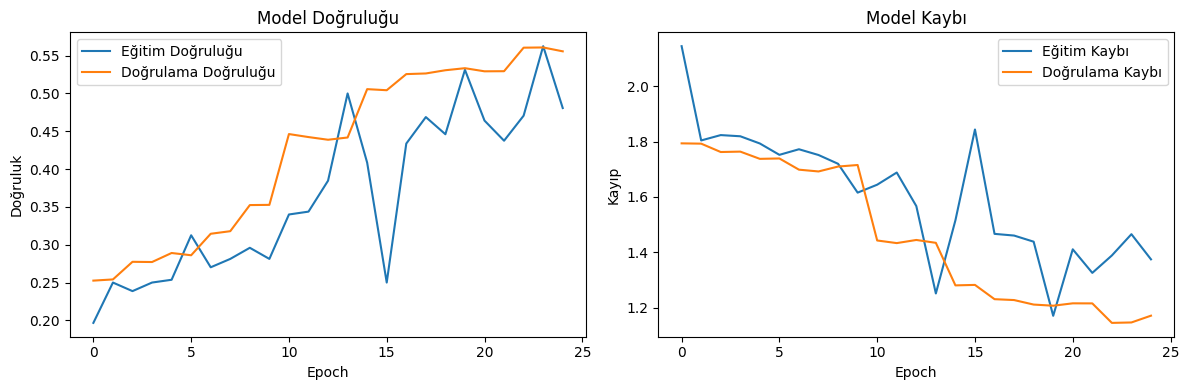

In [17]:
import matplotlib.pyplot as plt

# Eğitim geçmişini görselleştirme
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Accuracy grafiği
    ax1.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
    ax1.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
    ax1.set_title('Model Doğruluğu')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Doğruluk')
    ax1.legend()
    
    # Loss grafiği
    ax2.plot(history.history['loss'], label='Eğitim Kaybı')
    ax2.plot(history.history['val_loss'], label='Doğrulama Kaybı')
    ax2.set_title('Model Kaybı')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Kayıp')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Eğitim geçmişini görselleştir
plot_training_history(history)

In [18]:
# Yüz tespiti için Haar Cascade ve eğitilen model
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
classifier = load_model('Emotion_little_vgg.h5')

# Duygu etiketleri
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

print("Model ve sınıflandırıcı başarıyla yüklendi!")
print(f"Duygu sınıfları: {class_labels}")

Model ve sınıflandırıcı başarıyla yüklendi!
Duygu sınıfları: ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


In [19]:
def real_time_emotion_detection():
    """
    Kameradan gerçek zamanlı duygu tanıma yapar
    'q' tuşuna basarak çıkış yapılabilir
    """
    cap = cv2.VideoCapture(0)
    
    print("Kamera başlatıldı. Çıkmak için 'q' tuşuna basın.")
    
    while True:
        # Kameradan görüntü yakala
        ret, frame = cap.read()
        
        if not ret:
            print("Kamera görüntüsü alınamıyor!")
            break
            
        labels = []
        
        # Görüntüyü gri tonlamaya çevir
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Yüzleri tespit et
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)
        
        for (x, y, w, h) in faces:
            # Yüz etrafına dikdörtgen çiz
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            
            # Yüz bölgesini ayıkla ve yeniden boyutlandır
            roi_gray = gray[y:y+h, x:x+w]
            roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)
            
            # Yüz tespit edilmişse tahmin yap
            if np.sum([roi_gray]) != 0:
                # Veriyi normalize et ve modele uygun hale getir
                roi = roi_gray.astype('float') / 255.0
                roi = img_to_array(roi)
                roi = np.expand_dims(roi, axis=0)
                
                # Duygu tahmini yap
                preds = classifier.predict(roi)[0]
                label = class_labels[preds.argmax()]
                
                # Etiketi görüntüye ekle
                label_position = (x, y)
                cv2.putText(frame, label, label_position, 
                           cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
            else:
                cv2.putText(frame, 'No Face Found', (20, 60), 
                           cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
        
        # Görüntüyü göster
        cv2.imshow('Emotion Detector', frame)
        
        # 'q' tuşuna basıldığında çık
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Kaynakları serbest bırak
    cap.release()
    cv2.destroyAllWindows()
    print("Kamera kapatıldı.")

# Fonksiyonu çalıştırmak için:
# real_time_emotion_detection()

In [21]:
def analyze_single_image(image_path):
    """
    Tek bir görüntüdeki duyguları analiz eder
    """
    # Görüntüyü yükle
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Görüntü yüklenemedi: {image_path}")
        return
    
    # Gri tonlamaya çevir
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Yüzleri tespit et
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if len(faces) == 0:
        print("Görüntüde yüz tespit edilemedi.")
        return
    
    print(f"{len(faces)} yüz tespit edildi.")
    
    for i, (x, y, w, h) in enumerate(faces):
        # Yüz bölgesini ayıkla
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)
        
        if np.sum([roi_gray]) != 0:
            # Veriyi hazırla
            roi = roi_gray.astype('float') / 255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi, axis=0)
            
            # Tahmin yap
            preds = classifier.predict(roi)[0]
            label = class_labels[preds.argmax()]
            confidence = np.max(preds) * 100
            
            print(f"Yüz {i+1}: {label} (Güven: {confidence:.2f}%)")
            
            # Görüntüye etiket ekle
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(image, f"{label} ({confidence:.1f}%)", 
                       (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    
    # Sonucu göster
    cv2.imshow('Emotion Analysis', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Kullanım örneği:
# analyze_single_image('test_image.jpg')

In [22]:
# Bu kodu yeni bir dosyaya kaydedin: streamlit_app.py

import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Streamlit sayfa ayarları
st.set_page_config(page_title="Duygu Tanıma", page_icon=":smiley:", layout="centered")

# Özel CSS stilleri
st.markdown("""
    <style>
    .main {background-color: #222831;}
    .stApp {background-color: #222831;}
    .stButton>button {background-color: #00adb5; color: white;}
    .stRadio>div {color: #00adb5;}
    .stFileUploader {background-color: #393e46;}
    .stImage {border-radius: 10px; box-shadow: 0 4px 16px rgba(0,0,0,0.3);}
    </style>
""", unsafe_allow_html=True)

# Model ve sınıflandırıcı yükleme
@st.cache_resource
def load_models():
    model = load_model('Emotion_little_vgg.h5', compile=False)
    face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    return model, face_classifier

model, face_classifier = load_models()
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Başlık ve açıklama
st.markdown("<h1 style='text-align: center; color: #00adb5;'>Duygu Tanıma Uygulaması</h1>", 
            unsafe_allow_html=True)
st.markdown(
    "<div style='background-color: #393e46; padding: 15px; border-radius: 10px; color: #eeeeee; text-align: center;'>"
    "Kameradan veya yüklediğiniz fotoğraftan yüz ifadesi analizi yapar."
    "</div>", unsafe_allow_html=True
)

st.write("")

# Seçenek menüsü
secenek = st.radio('Analiz yöntemi seçin:', ('Kamera', 'Fotoğraf Yükle'))

# Kamera seçeneği
if secenek == 'Kamera':
    run = st.checkbox('Kamerayı Başlat')
    FRAME_WINDOW = st.image([])
    
    if run:
        cap = cv2.VideoCapture(0)
        
        while run:
            ret, frame = cap.read()
            
            if not ret:
                st.warning("Kamera görüntüsü alınamıyor.")
                break
                
            # Yüz tespiti ve duygu analizi
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = face_classifier.detectMultiScale(gray, 1.3, 5)
            
            for (x, y, w, h) in faces:
                roi_gray = gray[y:y+h, x:x+w]
                roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)
                
                if np.sum([roi_gray]) != 0:
                    roi = roi_gray.astype('float') / 255.0
                    roi = img_to_array(roi)
                    roi = np.expand_dims(roi, axis=0)
                    
                    preds = model.predict(roi)[0]
                    label = class_labels[preds.argmax()]
                    
                    label_position = (x, y-10)
                    cv2.putText(frame, label, label_position, 
                               cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
                
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 173, 181), 2)
            
            # Görüntüyü Streamlit'te göster
            FRAME_WINDOW.image(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        
        cap.release()
    else:
        st.info("Kamerayı başlatmak için kutucuğu işaretleyin.")

# Fotoğraf yükleme seçeneği
elif secenek == 'Fotoğraf Yükle':
    uploaded_file = st.file_uploader("Bir fotoğraf yükleyin", type=["jpg", "jpeg", "png"])
    
    if uploaded_file is not None:
        # Dosyayı okuma
        file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
        image = cv2.imdecode(file_bytes, 1)
        
        # Yüz tespiti ve duygu analizi
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)
        
        labels = []
        
        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)
            
            if np.sum([roi_gray]) != 0:
                roi = roi_gray.astype('float') / 255.0
                roi = img_to_array(roi)
                roi = np.expand_dims(roi, axis=0)
                
                preds = model.predict(roi)[0]
                label = class_labels[preds.argmax()]
                labels.append(label)
                
                label_position = (x, y-10)
                cv2.putText(image, label, label_position, 
                           cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
            
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 173, 181), 2)
        
        # Sonuçları göster
        st.image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 
                caption='Analiz Sonucu', use_container_width=True)
        
        if len(faces) == 0:
            st.warning("Yüz tespit edilemedi.")
        else:
            st.success("Analiz Sonucu:")
            for i, label in enumerate(labels):
                st.write(f"Yüz {i+1}: :smiley: **{label}**")

2025-06-02 20:12:27.145 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 20:12:27.146 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 20:12:27.393 
  command:

    streamlit run C:\Users\Soheyb Boutadjine\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-02 20:12:27.394 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 20:12:27.395 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 20:12:27.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 20:12:27.396 Thread 'MainThread': missing ScriptRunContext! This w

In [23]:
# Model dosyası kontrolü
import os
if os.path.exists('Emotion_little_vgg.h5'):
    print("✅ Model dosyası mevcut")
else:
    print("❌ Model dosyası bulunamadı")

# Haar Cascade kontrolü
if os.path.exists('haarcascade_frontalface_default.xml'):
    print("✅ Haar Cascade dosyası mevcut")
else:
    print("❌ Haar Cascade dosyası bulunamadı")

# Kamera kontrolü
cap = cv2.VideoCapture(0)
if cap.isOpened():
    print("✅ Kamera erişilebilir")
    cap.release()
else:
    print("❌ Kamera erişilemiyor")

✅ Model dosyası mevcut
✅ Haar Cascade dosyası mevcut
✅ Kamera erişilebilir
